## Decision Tree classification  : Implementing using python


 ## CART : Classification And Regression Tree 
Using iris dataset to find which flower is this by given its features 

### KEY NOTE:
1. Need to understand what kind of questions we should ask for the given dataset
2. decide which question to ask and when

### Step 1: Importing the modules

In [1]:
#data working lib
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#data visualization lib
import matplotlib.pyplot as plt
import seaborn as sn

### Step 2: Reading the dataset

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#concatenating features with target value .
data = pd.DataFrame(iris.data , columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data['Species'] = iris.target

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data.Species.replace(0.0 , 'iris-setosa' , inplace = True)
data.Species.replace(1.0 , 'iris-versicolor' , inplace = True)
data.Species.replace(2.0 , 'iris-virginica' , inplace = True)

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa
5,5.4,3.9,1.7,0.4,iris-setosa
6,4.6,3.4,1.4,0.3,iris-setosa
7,5.0,3.4,1.5,0.2,iris-setosa
8,4.4,2.9,1.4,0.2,iris-setosa
9,4.9,3.1,1.5,0.1,iris-setosa


In [9]:
data.shape

(150, 5)

### Step 4: Visualizing correlation  

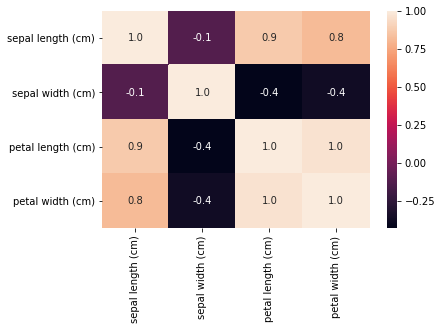

In [10]:
corr_matrix = data.corr()
sn.heatmap(corr_matrix,annot=True,cbar = True,fmt = '.1f')

Here , we see that the petal width anf petal length has a positive correlation. ie.,petal length is the best suit for rootNode  

### Step 5: Forming Questions

Here, Building the class in which the proper parameters ll frame the questions for us.

In [11]:
class Question(object):
    #taking columns and value as an attributes
    def __init__(self , column , val):
        self.column = column
        self.val = val
        
    #Matching the values with the column
    def match(self,data):
        '''returns True if the value in given column is greater than input value
           else, it returns False'''
        val = data[self.column]
        return val >= self.val
    
    #string representation
    def __repr__(self):
        condition = '>='
        return ('Is %s %s %s  ?'%(iris.feature_names[self.column] ,condition , self.val))
        
    

In [12]:
q = Question(1,3.5)
print(q)

Is sepal width (cm) >= 3.5  ?


In [13]:
q.match(iris.data[4])

True

### Step 6: Counting the labels

In [14]:
X = iris.data
y = iris.target
rows = np.c_[X,y]
def count_values(rows):
    #counting the no.of class labels seperately inside the dictionary
    count = {}
    for row in rows:
        label = row[-1]
        if label not in count:
            count[label] = 1
        else:
            count[label] += 1
    return count

In [15]:
count_values(rows)

{0.0: 50, 1.0: 50, 2.0: 50}

### Step 7: Splitting the rows according to the question

In [16]:
X = iris.data
y = iris.target
rows = np.c_[X,y]

def partition(rows , question):
    true_rows,false_rows = [],[]
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows,false_rows

In [17]:

t_r,f_r = partition(rows , Question(0,5))

In [18]:
print(Question(0,5))
t_r

Is sepal length (cm) >= 5  ?


[array([5.1, 3.5, 1.4, 0.2, 0. ]),
 array([5. , 3.6, 1.4, 0.2, 0. ]),
 array([5.4, 3.9, 1.7, 0.4, 0. ]),
 array([5. , 3.4, 1.5, 0.2, 0. ]),
 array([5.4, 3.7, 1.5, 0.2, 0. ]),
 array([5.8, 4. , 1.2, 0.2, 0. ]),
 array([5.7, 4.4, 1.5, 0.4, 0. ]),
 array([5.4, 3.9, 1.3, 0.4, 0. ]),
 array([5.1, 3.5, 1.4, 0.3, 0. ]),
 array([5.7, 3.8, 1.7, 0.3, 0. ]),
 array([5.1, 3.8, 1.5, 0.3, 0. ]),
 array([5.4, 3.4, 1.7, 0.2, 0. ]),
 array([5.1, 3.7, 1.5, 0.4, 0. ]),
 array([5.1, 3.3, 1.7, 0.5, 0. ]),
 array([5. , 3. , 1.6, 0.2, 0. ]),
 array([5. , 3.4, 1.6, 0.4, 0. ]),
 array([5.2, 3.5, 1.5, 0.2, 0. ]),
 array([5.2, 3.4, 1.4, 0.2, 0. ]),
 array([5.4, 3.4, 1.5, 0.4, 0. ]),
 array([5.2, 4.1, 1.5, 0.1, 0. ]),
 array([5.5, 4.2, 1.4, 0.2, 0. ]),
 array([5. , 3.2, 1.2, 0.2, 0. ]),
 array([5.5, 3.5, 1.3, 0.2, 0. ]),
 array([5.1, 3.4, 1.5, 0.2, 0. ]),
 array([5. , 3.5, 1.3, 0.3, 0. ]),
 array([5. , 3.5, 1.6, 0.6, 0. ]),
 array([5.1, 3.8, 1.9, 0.4, 0. ]),
 array([5.1, 3.8, 1.6, 0.2, 0. ]),
 array([5.3, 3.7, 1.

### Step 8: Quantifying methods

These methods is used to best split the dataset into subgroups (splitting of trees into branches to provide the best decision)

1.Gini Index.    
2.Entropy.    
3.Information Gain.

In [19]:
#Gini Index
def gini(rows):
    count = count_values(rows)
    #initialising impurity to 1
    impurity = 1
    for label in count:
        #probability of unique label
        prob_of_label = count[label]/float(len(rows))
        impurity -= prob_of_label ** 2
    return (impurity)

In [20]:
gini(rows)

0.6666666666666665

In [21]:
#Entropy
def entropy(rows):
    from math import log
    count = count_values(rows)
    #initislising entopy to 0
    entropy = 0
    #log2
    log2 = lambda x : log(x)/log(2)
    for label in count:
        p = count[label]/float(len(rows))
        entropy -= p*(log(p)/log(2))
    return entropy

In [22]:
entropy(rows)

1.584962500721156

In [23]:
#Information gain for Gini index
def info_gain_gini(current,left,right):
    #porbab of one branch
    p =float(len(left))/len(left)+len(right)
    #formula for info gian
    return current-p*gini(left)-(1-p)*gini(right)

In [24]:
#Information gain for Entropy
def info_gain_entropy(current , left , right):
    p = float(len(left))/len(left) + len(right)
    return current - p*entropy(left) - (1-p)*entropy(right)


### Step 9: Best Split

In [25]:
#Splitting the best dataset with respect to the quantifying methods (gini or entropy and iinfo_gain) and best question
def best_split(rows): 
    #initialising best gan and best question to 0 and None
    best_gain = 0
    best_question = None
    #can use both gini or entropy : (using entropy here)
    current = gini(rows)
    features = len(rows[0])-1
    for col in range(features):      #features = 4
        value = set([row[col] for row in rows])    #picking up values of feature
        for val in value:
            #forming question
            question = Question(col , val)
            #divide data based on tha question
            true_rows,false_rows = partition(rows,question)
            #if there is no true rows nd columns then continue the loop
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
            #calculating corresponding gain
            gain = info_gain_gini(current , true_rows , false_rows)
            #finding best info_gain
            if gain >= best_gain:
                best_gain,best_question = gain,question
    return best_gain,best_question
                

In [26]:
g , q =best_split(rows)

In [27]:
q

Is petal length (cm) >= 6.9  ?

### Step 10: Building tree

In [28]:
#class --> decisiontree
class DecisionTree:
    def __init__(self,question,true_branch,false_branch):
        #stores question
        self.question = question
        #stores true_branch
        self.true_branch = true_branch
        #stores false_branch
        self.false_branch = false_branch
    

In [29]:
#class leaf
class Leaf:
    def __init__(self,rows):
        #stores the leaf value
        self.predictions = count_values(rows)

In [30]:
def build_tree(rows):
    #info_gain and question formed
    gain,question = best_split(rows)
    
    #if gain = 0, then Leaf satisfied 
    if gain == 0:
        return Leaf(rows)
    
    #to find a best value or question to partition on
    true_rows,false_rows = partition(rows,question)
    #recursive function to build the model
    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)
    
    return DecisionTree(question , true_branch , false_branch)


In [31]:
tree = build_tree(rows)
tree

### Step 11: print the tree

In [32]:
def print_tree(node,indentation=""):
    '''printing function'''
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if isinstance(node,Leaf):
        print(indentation+"PREDICTION",node.predictions)
        return 
    #print the question at node
    print(indentation + str(node.question))
    
    #call the function on true branch 
    print(indentation+ "True Branch")
    print_tree(node.true_branch,indentation + " ")
    
    #on flase branch
    print(indentation+ "False Branch")
    print_tree(node.false_branch,indentation + " ")

In [33]:
print_tree(tree)

Is petal length (cm) >= 6.9  ?
True Branch
 PREDICTION {2.0: 1}
False Branch
 Is sepal width (cm) >= 4.4  ?
 True Branch
  PREDICTION {0.0: 1}
 False Branch
  Is sepal width (cm) >= 4.2  ?
  True Branch
   PREDICTION {0.0: 1}
  False Branch
   Is sepal length (cm) >= 7.9  ?
   True Branch
    PREDICTION {2.0: 1}
   False Branch
    Is sepal width (cm) >= 4.1  ?
    True Branch
     PREDICTION {0.0: 1}
    False Branch
     Is sepal width (cm) >= 4.0  ?
     True Branch
      PREDICTION {0.0: 1}
     False Branch
      Is petal length (cm) >= 6.7  ?
      True Branch
       PREDICTION {2.0: 2}
      False Branch
       Is petal length (cm) >= 6.6  ?
       True Branch
        PREDICTION {2.0: 1}
       False Branch
        Is petal length (cm) >= 6.3  ?
        True Branch
         PREDICTION {2.0: 1}
        False Branch
         Is sepal length (cm) >= 7.7  ?
         True Branch
          PREDICTION {2.0: 1}
         False Branch
          Is sepal length (cm) >= 7.4  ?
          Tru

### Step 12: splitting information

In [34]:
def split_info(left,right):
    num = float(len(left))
    den = len(right) + len(left)
    p = num/den
    from math import log
    log10 = lambda x : log(x)/log(10)
    
    return -(log10(p)*p+(1-p)*log10(1-p))

### Step 13: Printing tree in a better way

In [35]:
def print_tree_output(rows,level):
    gain,question = best_split(rows)
    
    #if gain = 0 , then
    if gain == 0:
        print('Level ',level)
        count = count_values(rows)
        for val in count:
            print('Count of ',val,'=',count[val])
        print('current entropy is ',entropy(rows))
        print('Reached leaf node')
        return
        
    features = question.column
    true_rows,false_rows = partition(rows,question)
    split = split_info(true_rows,false_rows)
    gain1 = info_gain_entropy(entropy(rows),true_rows,false_rows)
    
    print('current entropy is ',entropy(rows))
    print('Splitting on feature ',iris.feature_names[features],' with gain ',str(gain1/split))
    
    print_tree_output(true_rows,level+1)
    print_tree_output(false_rows,level+1)

    
            

In [36]:
print_tree_output(rows,0)

current entropy is  1.584962500721156
Splitting on feature  petal length (cm)  with gain  13668.490189622818
Level  1
Count of  2.0 = 1
current entropy is  0.0
Reached leaf node
current entropy is  1.5848973705351974
Splitting on feature  sepal width (cm)  with gain  13501.92708309278
Level  2
Count of  0.0 = 1
current entropy is  0.0
Reached leaf node
current entropy is  1.5848967831152563
Splitting on feature  sepal width (cm)  with gain  13335.193479394704
Level  3
Count of  0.0 = 1
current entropy is  0.0
Reached leaf node
current entropy is  1.5847621959588345
Splitting on feature  sepal length (cm)  with gain  13169.966225081154
Level  4
Count of  2.0 = 1
current entropy is  0.0
Reached leaf node
current entropy is  1.584692986565173
Splitting on feature  sepal width (cm)  with gain  13004.562087248072
Level  5
Count of  0.0 = 1
current entropy is  0.0
Reached leaf node
current entropy is  1.5844836724135505
Splitting on feature  sepal width (cm)  with gain  12838.957797402541
Le

as we havent any max_depth this tree is overfitting to a very large extent
and will probably perform very poorly on any new data its performs on

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix()

In [41]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m